<a href="https://colab.research.google.com/github/saichandrapandraju/TF-Developer/blob/main/3.%20NLP/4_Generate_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
tf.random.set_seed(333)
import numpy as np 
np.random.seed(333)

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt

--2021-04-18 06:08:57--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 74.125.124.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2021-04-18 06:08:57 (70.7 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



**Read the data**

In [5]:
corpus = open('/tmp/sonnets.txt').read().lower().split('\n')

In [7]:
len(corpus)

2159

In [8]:
tok = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
tok.fit_on_texts(corpus)
total_words = len(tok.word_index)+1

In [9]:
total_words

3212

In [12]:
input_sequences = []
for line in corpus:
  token_list = tok.texts_to_sequences([line])[0]
  print(token_list)
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    print(n_gram_sequence)
  break

[35, 418, 878, 167, 214, 518]
[35, 418]
[35, 418, 878]
[35, 418, 878, 167]
[35, 418, 878, 167, 214]
[35, 418, 878, 167, 214, 518]


In [14]:
input_sequences = []
for line in corpus:
	token_list = tok.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

In [15]:
max_len = max([len(x) for x in input_sequences])

In [16]:
max_len

11

In [17]:
input_sequences = np.array(tf.keras.preprocessing.sequence.pad_sequences(input_sequences, maxlen=max_len, padding='pre'))

In [20]:
input_sequences[:6]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  35, 418],
       [  0,   0,   0,   0,   0,   0,   0,   0,  35, 418, 878],
       [  0,   0,   0,   0,   0,   0,   0,  35, 418, 878, 167],
       [  0,   0,   0,   0,   0,   0,  35, 418, 878, 167, 214],
       [  0,   0,   0,   0,   0,  35, 418, 878, 167, 214, 518],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9, 879]],
      dtype=int32)

In [21]:
xs, labels = input_sequences[:, :-1], input_sequences[:, -1]

In [22]:
xs[:6], labels[:6]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  35],
        [  0,   0,   0,   0,   0,   0,   0,   0,  35, 418],
        [  0,   0,   0,   0,   0,   0,   0,  35, 418, 878],
        [  0,   0,   0,   0,   0,   0,  35, 418, 878, 167],
        [  0,   0,   0,   0,   0,  35, 418, 878, 167, 214],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9]], dtype=int32),
 array([418, 878, 167, 214, 518, 879], dtype=int32))

In [23]:
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [31]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(total_words, 100, input_length=max_len-1),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
                             tf.keras.layers.LSTM(64),
                             tf.keras.layers.Dense(1024, activation='relu'),
                             tf.keras.layers.Dense(total_words, activation='softmax')
])

In [32]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321200    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 256)           234496    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                82176     
_________________________________________________________________
dense (Dense)                (None, 1024)              66560     
_________________________________________________________________
dense_1 (Dense)              (None, 3212)              3292300   
Total params: 3,996,732
Trainable params: 3,996,732
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(xs, ys, epochs=33, verbose=1)

Epoch 1/33
484/484 [==============================] - 45s 81ms/step - loss: 7.0244 - accuracy: 0.0206
Epoch 2/33
484/484 [==============================] - 40s 83ms/step - loss: 6.4348 - accuracy: 0.0306
Epoch 3/33
484/484 [==============================] - 40s 83ms/step - loss: 6.1891 - accuracy: 0.0383
Epoch 4/33
484/484 [==============================] - 40s 83ms/step - loss: 5.9750 - accuracy: 0.0431
Epoch 5/33
484/484 [==============================] - 40s 83ms/step - loss: 5.7595 - accuracy: 0.0510
Epoch 6/33
484/484 [==============================] - 40s 83ms/step - loss: 5.5078 - accuracy: 0.0668
Epoch 7/33
484/484 [==============================] - 41s 84ms/step - loss: 5.2765 - accuracy: 0.0717
Epoch 8/33
484/484 [==============================] - 40s 82ms/step - loss: 5.0586 - accuracy: 0.0844
Epoch 9/33
484/484 [==============================] - 41s 84ms/step - loss: 4.8277 - accuracy: 0.0958
Epoch 10/33
484/484 [==============================] - 41s 85ms/step - loss: 4.550

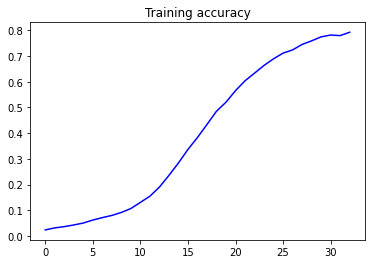

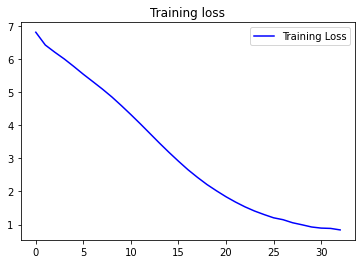

In [34]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [35]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 10

In [38]:
for _ in range(next_words):
	token_list = tok.texts_to_sequences([seed_text])[0]
	token_list = tf.keras.preprocessing.sequence.pad_sequences([token_list], maxlen=max_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tok.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Help me Obi Wan Kenobi, you're my only hope my mind grow'st sheds ' my gain of love back
